# <u>Data Science Essentials</u>

## <u>Topic</u>: Subplots

## <u>Category</u>: Data Visualization

### <u>Created by</u>: Mohammed Misbahullah Sheriff 

- [LinkedIN](https://www.linkedin.com/in/mohammed-misbahullah-sheriff/)
- [GitHub](https://github.com/MisbahullahSheriff)

## Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

## Data Gathering

In [2]:
file_dir = "C:\Python Programs\datasets"
file_name = "housing.csv"
file_path = os.path.join(file_dir, file_name)

df = pd.read_csv(file_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
digits = fetch_openml("mnist_784",
                      as_frame=False,
                      parser="auto")
digits = digits.data
print("Data Shape:", digits.shape)
digits[:5]

Data Shape: (70000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Demo-1

- When the dimensions of the subplots are known

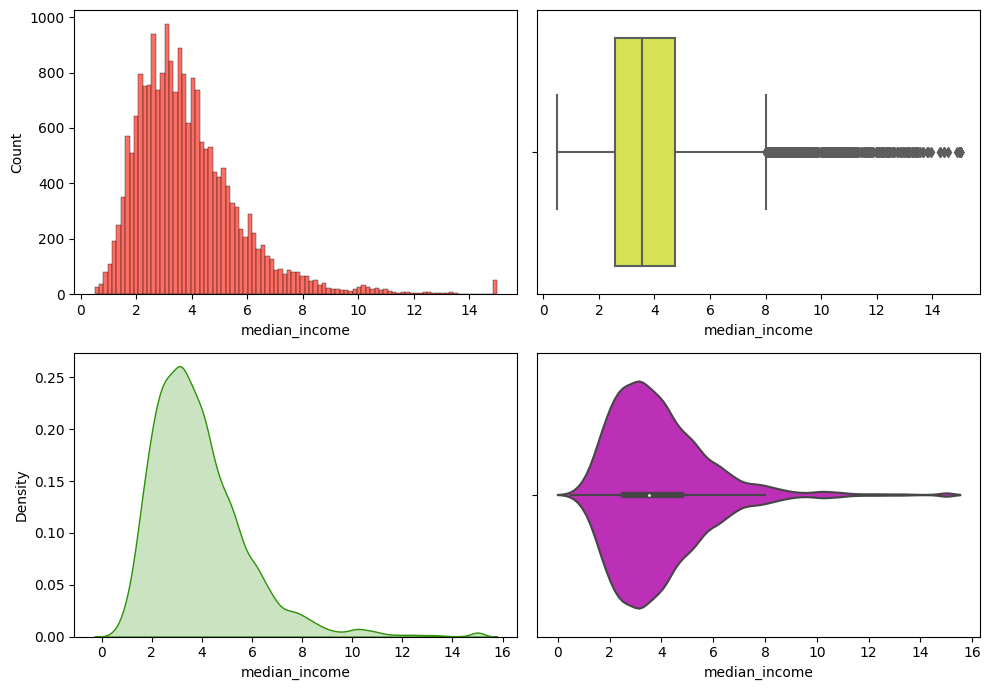

In [4]:
fig, axes = plt.subplots(nrows=2,
                         ncols=2,
                         figsize=(10, 7))

axes = axes.ravel()

# 1st axes (top-left)
sns.histplot(data=df,
             x="median_income",
             color="#fc3e30",
             ax=axes[0])

# 2nd axes (top-right)
sns.boxplot(data=df,
            x="median_income",
            color="#eafa3c",
            ax=axes[1])

# 3rd axes (bottom-left)
sns.kdeplot(data=df,
            x="median_income",
            color="#2c9107",
            fill=True,
            ax=axes[2])

# 4th axes (bottom-right)
sns.violinplot(data=df,
               x="median_income",
               color="#d417cd",
               ax=axes[3])

plt.tight_layout()
plt.show()

## Demo-2

- When the dimensions of the subplots are unknown

In [5]:
def plot_digits(n, n_cols=5):
    """
    Description:
    ------------
    This function will plot an arbitrary no. of digits (n) within subplots 
    governed by (n_cols) columns
    
    
    Parameters:
    -----------
    n: int
       No. of digits to plot
    
    n_cols: int
            No. of columns to include in the subplot
    """
    
    indices = np.random.choice(digits.shape[0],
                               size=n,
                               replace=False)
    sample = digits[indices]
    div, mod = divmod(n, n_cols)
    n_rows = div if (mod == 0) else (div + 1)
    
    fig = plt.figure(figsize=(n_cols * 3, n_rows * 3))
    
    for i in range(n):
        digit = sample[i].reshape(28, 28)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(digit, cmap="binary")
        plt.axis("off")
        
    plt.tight_layout()
    plt.show()

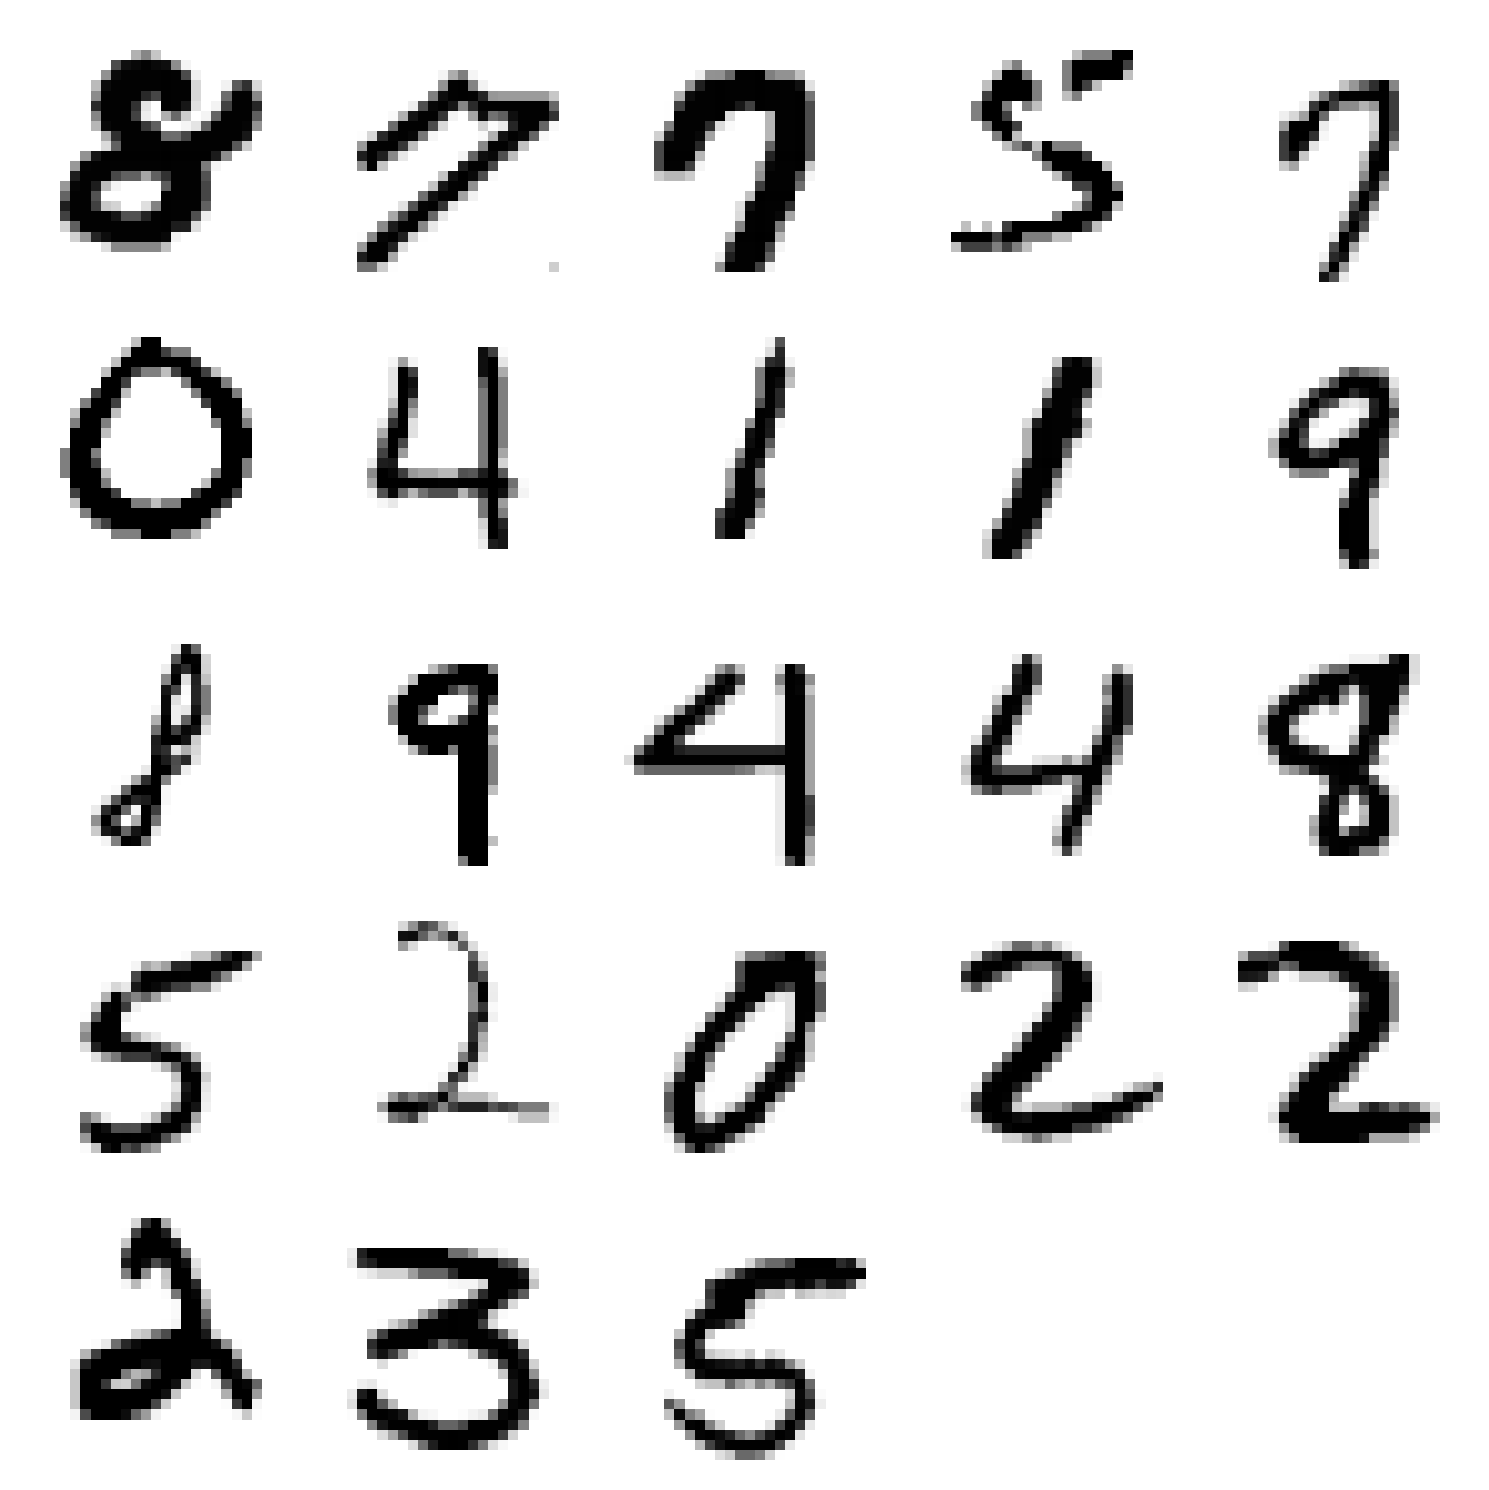

In [6]:
plot_digits(n=23, n_cols=5)